In [1]:
import qiskit
from matplotlib import pyplot as plt
import numpy as np
from qiskit_machine_learning.datasets import ad_hoc_data, breast_cancer
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import QSVC

In [2]:
feature_dim = 2
training_size = 20
testing_size = 10
random_seed = 12345
shots = 10000

/var/folders/9c/_mcnftr9327fc2k3mqf4cdh80000gn/T/ipykernel_16923/4203747337.py:1: DeprecationWarning: The breast_cancer function is deprecated as of version 0.4.0 and will be removed no sooner than 3 months after the release.
  training_features, train_labels, testing_features, test_labels = breast_cancer(training_size=training_size,


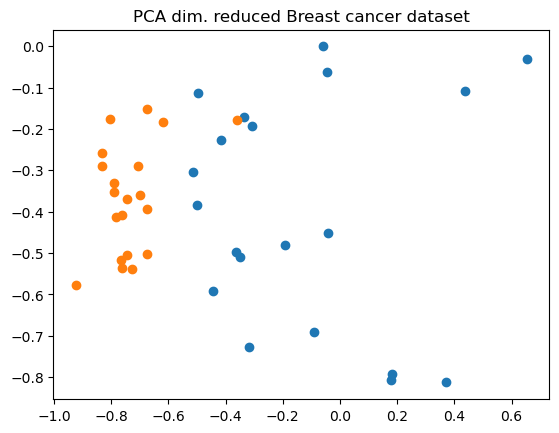

In [3]:
#can use either ad_hoc_data or breast_cancer dataset
training_features, train_labels, testing_features, test_labels = breast_cancer(training_size=training_size, 
                                                                             test_size=testing_size,
                                                                             n=feature_dim, 
                                                                             plot_data=True)

In [4]:
training_labels = []
testing_labels = []
for i in range(test_labels.shape[0]):
    testing_labels.append(test_labels[i][0])
for i in range(train_labels.shape[0]):
    training_labels.append(train_labels[i][0])

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
quantum_instance = QuantumInstance(backend, 
                                   shots=shots, 
                                   seed_simulator=random_seed, 
                                   seed_transpiler=random_seed)

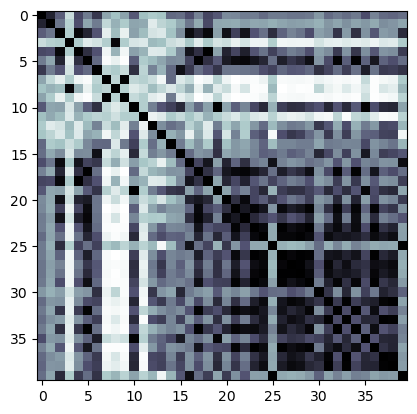

In [6]:
kernel = QuantumKernel(feature_map, quantum_instance=quantum_instance)
kernel.random_seed = random_seed
kernel_matrix = kernel.evaluate(training_features)
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation="nearest", origin="upper", cmap="bone_r")
plt.show()

In [7]:
qsvc = QSVC(quantum_kernel=kernel)
qsvc.fit(training_features, training_labels)
predicted_labels = qsvc.predict(testing_features)
qsvc_score = qsvc.score(testing_features, testing_labels)

In [8]:
print(f"true labels:      {np.array(testing_labels)}")
print(f"predicted labels: {np.array(predicted_labels)}")
print(f"QSVC classification test score: {qsvc_score}")

true labels:      [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted labels: [1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
QSVC classification test score: 0.75
